In [25]:
#Relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [26]:
#importing the data

df = pd.read_csv('../data/tweets_cleaned_eda.csv')

In [27]:
df.head()

,Unnamed: 0,tweet_text,cyberbullying_type,cleaned_tweets,tweet_length
0,0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr,61
1,1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,115
2,2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,60
3,3,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account . like isl...,103
4,4,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,131


In [28]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [29]:
#Replacing categories with numeric category column

df['cyberbullying_type'].replace(['not_cyberbullying', 'gender', 'religion','age', 'ethnicity','other_cyberbullying'],
                        [0, 1, 2, 3, 4, 5], inplace=True)

df.head()

,Unnamed: 0,tweet_text,cyberbullying_type,cleaned_tweets,tweet_length
0,0,"In other words #katandandre, your food was cra...",0,word katandandre food crapilicious mkr,61
1,1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...,115
2,2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore red velvet cupcake,60
3,3,@RudhoeEnglish This is an ISIS account pretend...,0,isi account pretend kurdish account . like isl...,103
4,4,"@Raja5aab @Quickieleaks Yes, the test of god i...",0,yes test god good bad indifferent weird whatev...,131


In [6]:
#Removing NaN cleaned tweets
df[df['cleaned_tweets'].isna()]

,Unnamed: 0,tweet_text,cyberbullying_type,cleaned_tweets,tweet_length
377,377,@kylieminogue @muse,0,NaN,19
1102,1102,@CanadianSpider how are you?,0,NaN,28
1136,1136,@TakeAStand2Day,0,NaN,15
2134,2134,@itvnews @mittromney @barackobama @robertmooreitv,0,NaN,49
2173,2173,That is all,0,NaN,11
3147,3147,@jarihimanen How so?,0,NaN,20
3674,3674,Why?,0,NaN,4
4600,4600,@TheyLOVEJayP or what,0,NaN,21
4629,4629,@g56yu Who?,0,NaN,12
5288,5288,Just NOW?!?!? 😄😃😀,0,NaN,18


In [30]:
#dropping the NA files
df = df.dropna()
df[df['cleaned_tweets'].isna()]

,Unnamed: 0,tweet_text,cyberbullying_type,cleaned_tweets,tweet_length


In [33]:
df.duplicated(subset=['cleaned_tweets']).sum()

909

In [37]:
#dropping duplicated cleaned tweets
df.drop_duplicates(subset=['cleaned_tweets'], inplace=True)
df.duplicated(subset=['cleaned_tweets']).sum()

0

Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

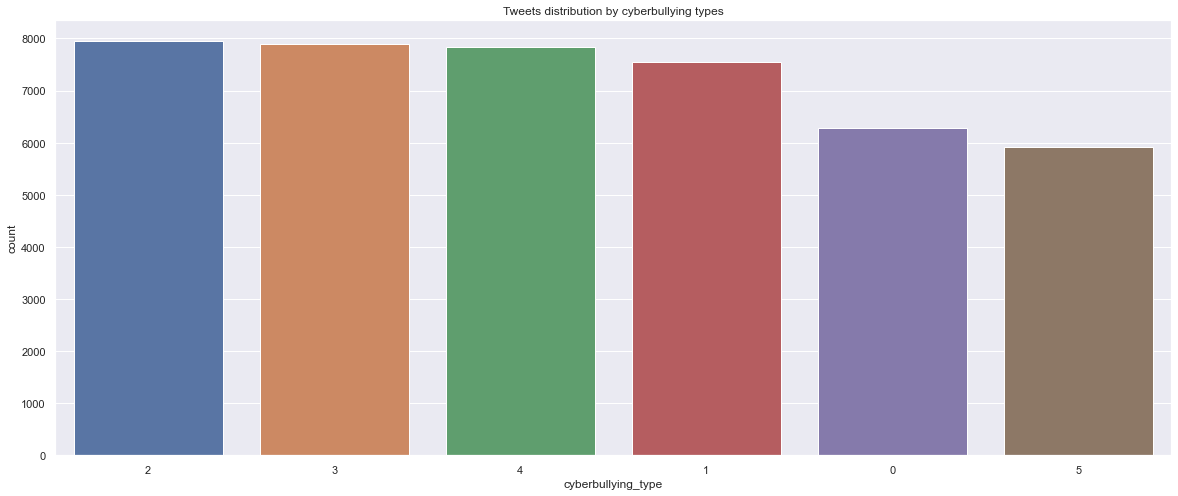

In [38]:
#Checking the differtent catergoies after cleaning tweets
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [39]:
df2 = df[['cleaned_tweets', 'cyberbullying_type']]
df2.to_csv('../data/train_tweets.csv', index=False)